4-2 단어 빈도를 이용한 벡터화 (1) Bag of Words
4-3 단어 빈도를 이용한 벡터화 (2) Bag of Words 구현해보기
4-4 단어 빈도를 이용한 벡터화 (3) DTM과 코사인 유사도
4-5 단어 빈도를 이용한 벡터화 (4) DTM의 구현과 한계점
4-6 단어 빈도를 이용한 벡터화 (5) TF-IDF
4-7 단어 빈도를 이용한 벡터화 (6) TF-IDF 구현하기
4-8 LSA와 LDA (1) LSA
4-9 LSA와 LDA (2) LSA 실습
4-10 LSA와 LDA(2) LDA
4-11 LSA와 LDA(3) LDA 실습
4-12 텍스트 분포를 이용한 비지도 학습 토크나이저 (1) 형태소 분석기와 단어 미등록 문제
4-13 텍스트 분포를 이용한 비지도 학습 토크나이저 (2) sonynlp
4-14

### 4-2 단어 빈도를 이용한 벡터화 (1) Bag of Words


### 4-5 단어 빈도를 이용한 벡터화 (4) DTM의 구현과 한계점

In [1]:
# sckit-learn CountVecotrizer 활용
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'John likes to watch movies',
    'Mary likes movies too',
    'Mary also likes to watch football games', 
]

vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


DTM의 2가지 한계점 
1. 공간 낭비, DTM에서 문서의 수와 단어의 수가 계속 늘어날수록, 행과 열은 대부분의 값이 0을 가진다는 특징이 있다. (지나친 차원의 크기는 차원의 저주)
2. 단어의 빈도에만 집중하는 방법 자체의 한계, ex)불용어 'the'는 문서의 종류/맥락/내용과 상관없이 어디에든 많음. 그럼 문서1과 2의 the 코사인 유사도는 높을까?


### 4-6 단어 빈도를 이용한 벡터화 (5) TF-IDF
TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에만 자주 등장하는 단어는 중요도가 높다고 판단하는 것. 
Term Frequency-Inverse Document Frequency의 약자이다. '단어빈도-역문서 빈도'이다. <br>

방법)TF-IDF는 불용어처럼 중요도가 낮으면서 모든 문서에 등장하는 단어들이 노이즈가 되는 것을 완화해 줌. 주의할 점은 TF-IDF를 사용하는 것이 DTM을 사용하는 것보다 성능이 항상 뛰어나지는 않다는 점이다. TF-IDF를 사용하기 위해서는 우선 DTM을 만든 뒤에 TF-IDF 가중치를 DTM에 적용한다. <br><br>



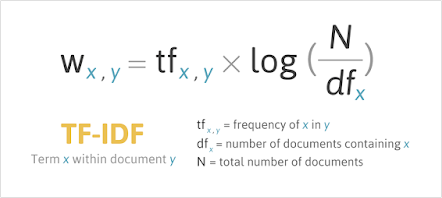 <br>
위의 이미지는 y는 문서, x는 단어라고 할 때 TF-IDF의 수식을 보여준다. TF는 앞서 설명했듯이 각 문서에 등장하는 단어의 빈도를 의미하므로 DTM을 만들면 자연스럽게 해결됨.


IDF를 구하기 위해서는 우선 문서 빈도 DF와 전체 문서의 수 N을 이해해야 합니다 <br>


### 4-7 단어 빈도를 이용한 벡터화 (6) TF-IDF 구현하기

In [2]:
from math import log
import pandas as pd
print('=3')

=3


In [3]:
docs = [
    'John likes to watch movies and Mary likes movies too',
    'James likes to watch TV',
    'Mary also likes to watch football games',  
]
print('=3')

=3


In [4]:
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


In [5]:
N = len(docs) # 총 문서의 수
N

3

In [6]:
def tf(t, d):
    return d.count(t)
 
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc    
    return log(N/(df + 1)) + 1
 
def tfidf(t, d):
    return tf(t,d)* idf(t)

In [7]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,2,1,1
1,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,1,0,1


In [8]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns=["IDF"])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movies,1.405465


In [9]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.712318,0.000000,0.712318


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]

tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(tfidfv.vocabulary_.keys()) # 단어장을 리스트로 저장
vocab.sort() # 단어장을 알파벳 순으로 정렬

# TF-IDF 행렬에 단어장을 데이터프레임의 열로 지정하여 데이터프레임 생성
tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns = vocab)
tfidf_

,also,and,football,games,james,john,likes,mary,movies,to,too,tv,watch
0,0.000000,0.321556,0.000000,0.000000,0.000000,0.321556,0.379832,0.244551,0.643111,0.189916,0.321556,0.000000,0.189916
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.274634,0.000000,0.000000,0.274634


In [ ]:
### 4-8 